**EDA CODE**

In [3]:
# IMPORTING REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#LOADING DATASETS
customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
products_url = "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"
customers = pd.read_csv(customers_url)
products = pd.read_csv(products_url)
transactions = pd.read_csv(transactions_url)

In [5]:
# INPECTING CUSTOMER DATASET
print(customers.head())
print(customers.info())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [6]:
#INSPECTING PRODUCT DATASET
print(products.head())
print(products.info())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [7]:
#INSPECTING TRANSACTION DATASET
print(transactions.head())
print(transactions.info())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5

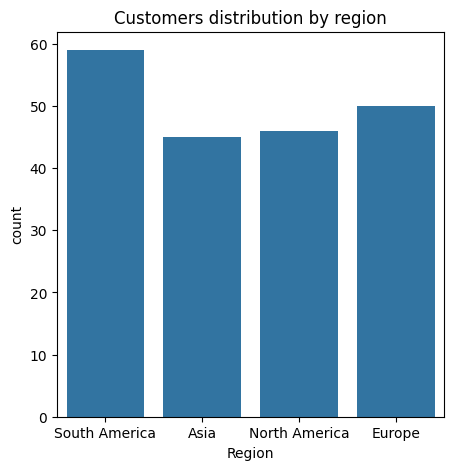

In [8]:
# VISUALIZING DATASETS
#CUSTOMERS DISTRIBUTION BY REGION
plt.figure(figsize= (5,5))
sns.countplot(data=customers, x='Region')
plt.title('Customers distribution by region')
plt.show()

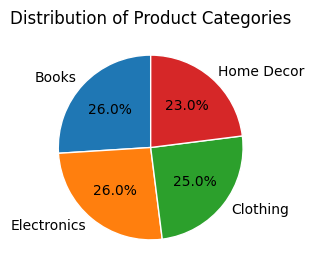

In [9]:
# DISTRIBUTION OF PRODUCTS BY CATEGORIES
category_counts = products['Category'].value_counts()
plt.figure(figsize=(3,3))
category_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title('Distribution of Product Categories')
plt.ylabel('')
plt.show()

In [11]:
# Find the top 10 high-value transactions
top_transactions = transactions.sort_values(by='TotalValue', ascending=False).head(10)
print("Top 10 High-Value Transactions:")
print(top_transactions[['TransactionID', 'CustomerID', 'TotalValue']])

Top 10 High-Value Transactions:
    TransactionID CustomerID  TotalValue
879        T00928      C0082     1991.04
509        T00499      C0065     1954.52
971        T00307      C0044     1927.12
562        T00224      C0171     1879.08
565        T00503      C0013     1879.08
566        T00558      C0169     1879.08
560        T00070      C0051     1879.08
997        T00922      C0018     1839.44
125        T00482      C0066     1825.12
119        T00034      C0168     1825.12


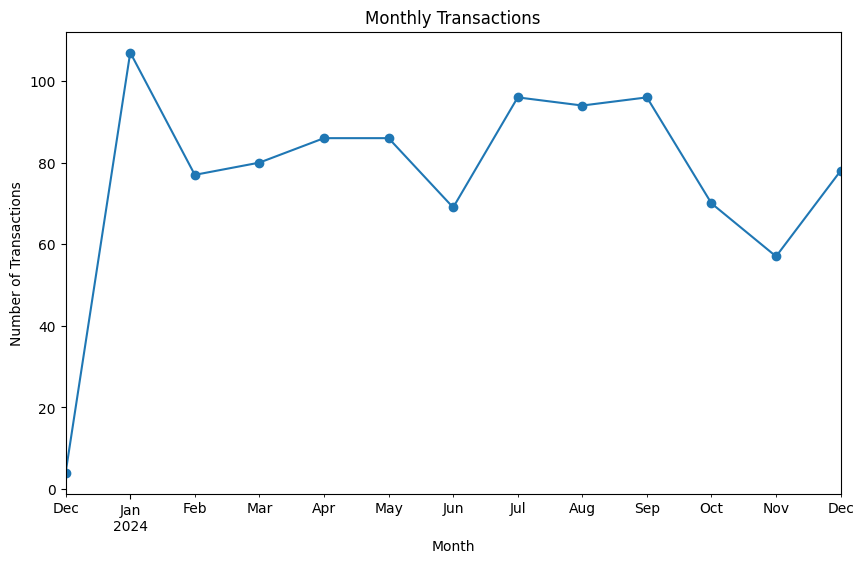

In [10]:
#MONTHLY TRANSACTIONS
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
monthly_transactions = transactions.groupby(transactions['TransactionDate'].dt.to_period('M')).size()
monthly_transactions.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Monthly Transactions')
plt.ylabel('Number of Transactions')
plt.xlabel('Month')
plt.show()

In [13]:
# Calculate total spending per customer
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spending.columns = ['CustomerID', 'TotalSpending']
top_customers = customer_spending.sort_values(by='TotalSpending', ascending=False).head(10)
print("Top 10 Customers by Spending:")
print(top_customers)

# Count of repeat purchases
repeat_customers = transactions['CustomerID'].value_counts().reset_index()
repeat_customers.columns = ['CustomerID', 'PurchaseCount']
print("Customers with Highest Repeat Purchases:")
print(repeat_customers.head(10))

Top 10 Customers by Spending:
    CustomerID  TotalSpending
140      C0141       10673.87
53       C0054        8040.39
64       C0065        7663.70
155      C0156        7634.45
81       C0082        7572.91
186      C0188        7111.32
58       C0059        7073.28
27       C0028        6819.57
98       C0099        6715.72
164      C0165        6708.10
Customers with Highest Repeat Purchases:
  CustomerID  PurchaseCount
0      C0109             11
1      C0156             11
2      C0141             10
3      C0175             10
4      C0065             10
5      C0008             10
6      C0147              9
7      C0093              9
8      C0075              9
9      C0084              9


Top 5 Most Purchased Products:
          ProductName  PurchaseCount
0     SoundWave Jeans             19
1  TechPro Headphones             17
2     HomeSense Novel             16
3      ActiveWear Rug             16
4  SoundWave Cookbook             16


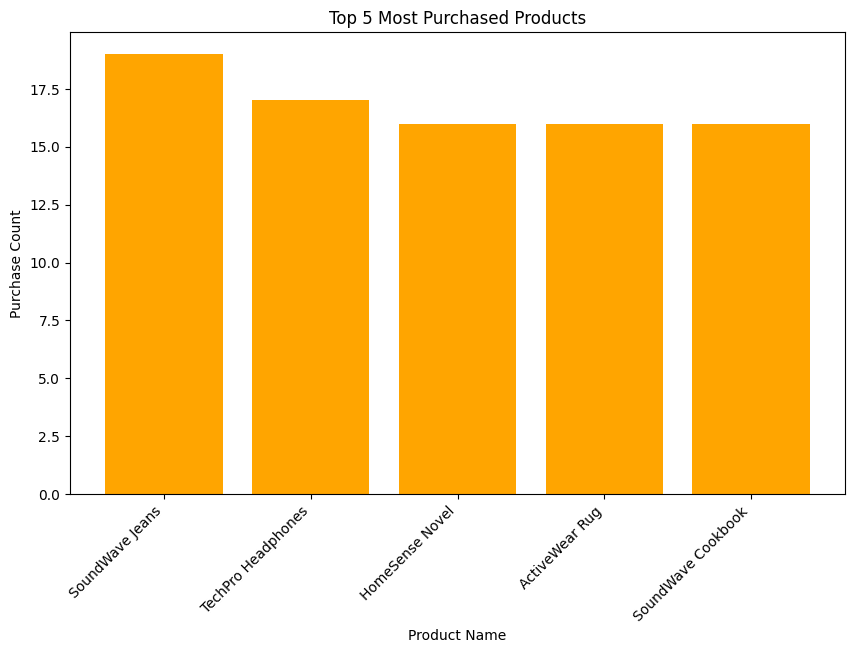

In [15]:
# Count the number of times each product was purchased
product_popularity = transactions['ProductID'].value_counts().reset_index()
product_popularity.columns = ['ProductID', 'PurchaseCount']

# Merge with Products dataset to get ProductName
top_5_products = pd.merge(product_popularity, products, on='ProductID').head(5)

# Display the top 5 most popular products
print("Top 5 Most Purchased Products:")
print(top_5_products[['ProductName', 'PurchaseCount']])

# Plot the top 5 most purchased products
plt.figure(figsize=(10, 6))
plt.bar(top_5_products['ProductName'], top_5_products['PurchaseCount'], color='orange')
plt.title('Top 5 Most Purchased Products')
plt.xlabel('Product Name')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45, ha='right')
plt.show()

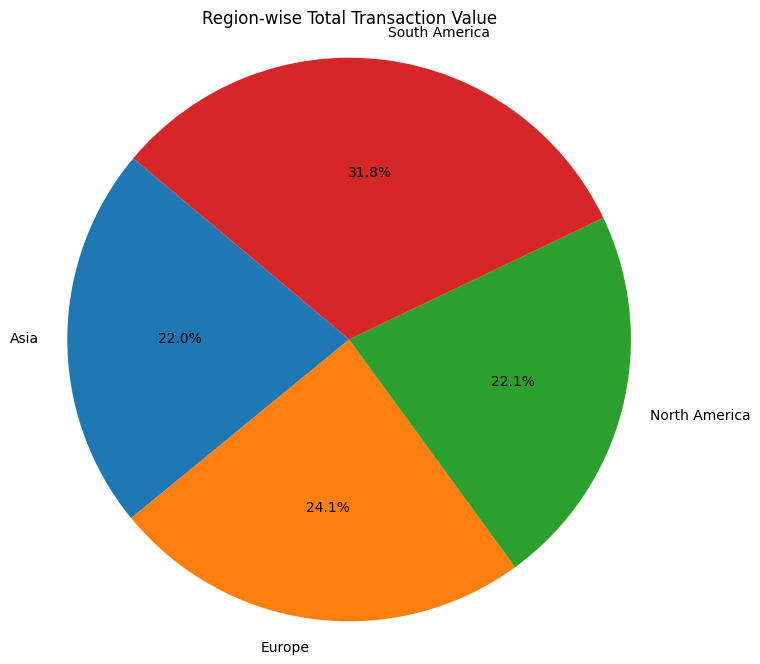

In [17]:
# REGION WISE TOTAL TRANSACTION
transactions_with_region = pd.merge(transactions, customers, on='CustomerID')
total_transaction_per_region = transactions_with_region.groupby('Region')['TotalValue'].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(total_transaction_per_region['TotalValue'],
        labels=total_transaction_per_region['Region'],
        autopct='%1.1f%%',
        startangle=140)

plt.title('Region-wise Total Transaction Value')
plt.axis('equal')
plt.show()